In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3

In [18]:
con = sqlite3.connect("data.db")
df = pd.read_sql_query("select * from car where name='206'", con)
df.head()

,name,price,model,mileage
0,206,310000000,1395,68000
1,206,292000000,1396,60000
2,206,250000000,1390,200000
3,206,280000000,1395,83000
4,206,325000000,1400,15000


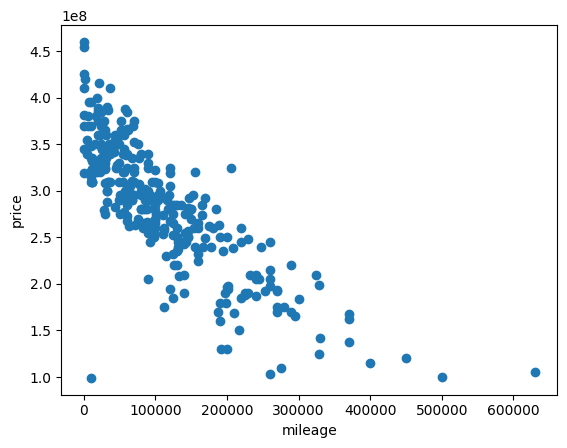

In [19]:
plt.scatter(df.mileage, df.price)
plt.xlabel("mileage")
plt.ylabel("price")
plt.show()

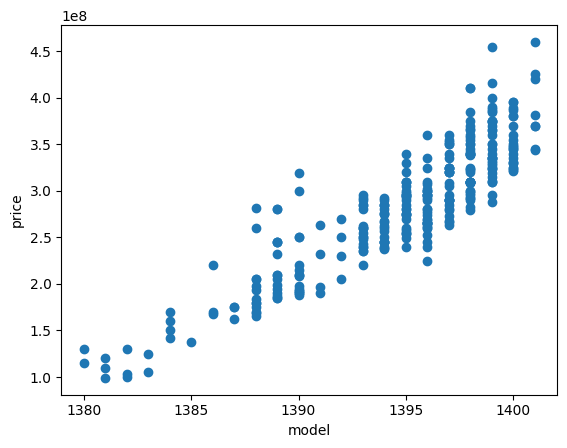

In [20]:
plt.scatter(df.model, df.price)
plt.xlabel("model")
plt.ylabel("price")
plt.show()

### Creating train and test dataset
We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.
Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the  **np.random.rand()** function:


In [38]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

### Train and test data distribution

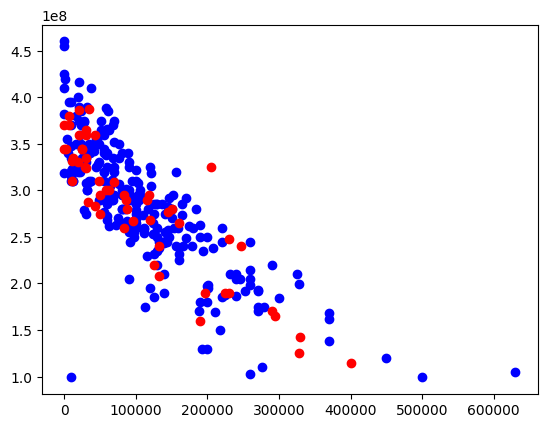

In [39]:
fig = plt.figure()
ax1 = plt.subplot()
plt.scatter(train.mileage, train.price,  color='blue')
plt.scatter(test.mileage, test.price,  color='red')
plt.show()

In [40]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[["mileage", 'model']])
train_y = np.asanyarray(train[["price"]])

regr.fit(train_x, train_y)
print(regr.coef_, regr.intercept_)

[[-1.61509166e+02  1.07815031e+07]] [-1.4735198e+10]


In [41]:
y_hat = regr.predict(test[['mileage', 'model']].values)
x = np.asanyarray(test[['mileage', 'model']])
y = np.asanyarray(test[['price']])
print(regr.score(x, y))

0.8519787134097212


In [42]:
a1 = regr.coef_[0][0]
a2 = regr.coef_[0][1]
interc = regr.intercept_[0]

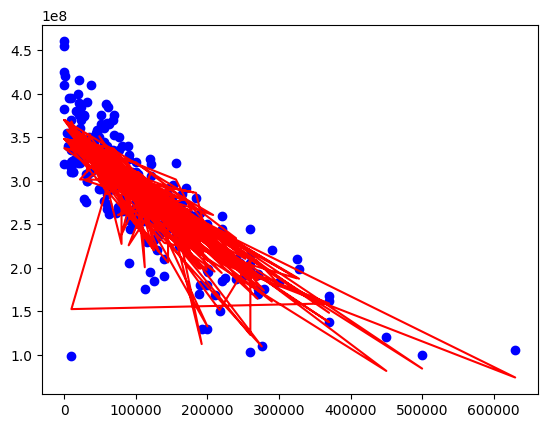

In [43]:
# a1x + a2x + b
plt.scatter(train.mileage, train.price,  color='blue')
plt.plot(train_x[:, 0], a1*train_x[:, 0] + a2*train_x[:, 1] + interc, 'r')
plt.show()

```price = -187.256423*mileage + 9878543.32*model -13476067092.369785```
> model should be in Solar Hijri Calender



### Sample of predicting
`prices are in toman`

In [44]:
print(regr.predict([[10000, 1398]])[0][0])  # mileage = 10,000 and model = 1398
print(regr.predict([[100000, 1390]])[0][0])  # mileage = 100,000 and model = 1390 
print(regr.predict([[10000, 1399]])[0][0])  # mileage = 10,000 and model = 1399
print(regr.predict([[1000, 1400]])[0][0])  # mileage = 1000, and model = 1400

335728139.2892113
234940289.8821888
346509642.3477516
358744727.90016365
